2025-11-05 22:14:20,779 INFO: Initializing external client
2025-11-05 22:14:20,779 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-11-05 22:14:23,923 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1271981
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.77s) 


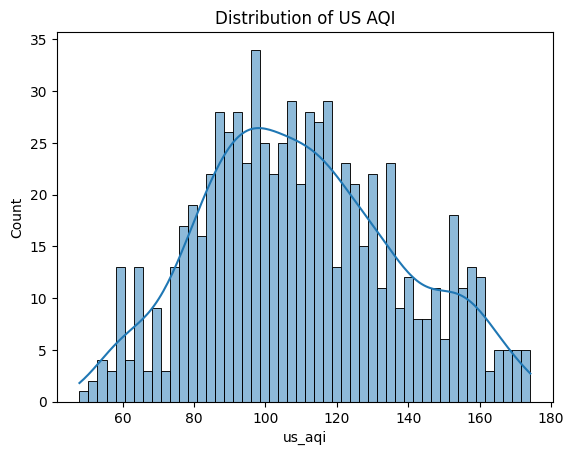

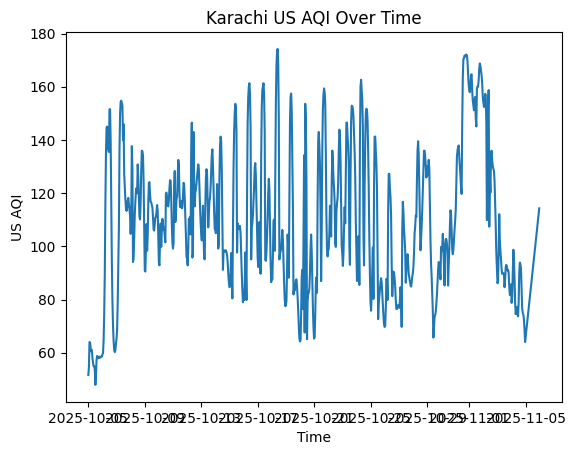

In [2]:
import os
import hopsworks
import pandas as pd
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns

load_dotenv()

# Connect to Hopsworks
project = hopsworks.login(
    api_key_value=os.getenv("HOPSWORKS_API_KEY"),
    project=os.getenv("HOPSWORKS_PROJECT")
)
fs = project.get_feature_store()

# Load your computed US AQI feature group
fg = fs.get_feature_group("karachi_aqi_us", version=1)
df = fg.read()

# Ensure datetime
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values('time')

# Simple plots
sns.histplot(df['us_aqi'], bins=50, kde=True)
plt.title("Distribution of US AQI")
plt.show()

plt.plot(df['time'], df['us_aqi'])
plt.title("Karachi US AQI Over Time")
plt.xlabel("Time")
plt.ylabel("US AQI")
plt.show()


In [3]:
import pandas as pd
import hopsworks
import os
from dotenv import load_dotenv

load_dotenv()
project = hopsworks.login(
    api_key_value=os.getenv("HOPSWORKS_API_KEY"),
    project=os.getenv("HOPSWORKS_PROJECT")
)
fs = project.get_feature_store()
df = fs.get_feature_group("karachi_aqi_us", version=1).read()

corr = df.corr(numeric_only=True)["us_aqi"].sort_values(ascending=False)
print(corr)
print(df.tail(5))

2025-11-05 22:14:32,760 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-11-05 22:14:32,776 INFO: Initializing external client
2025-11-05 22:14:32,778 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-11-05 22:14:35,151 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1271981
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.69s) 
us_aqi                  1.000000
pm2_5                   0.639068
aqi_pm25                0.636633
sulphur_dioxide         0.580194
aqi_pm10                0.432077
pm10                    0.396489
aqi_o3                  0.339226
carbon_monoxide         0.262596
temperature_2m          0.261062
nitrogen_dioxide        0.260414
ozone                   0.189612
relative_humidity_2m   -0.242659
wind_speed_10m         -0.284316
Name: us_aqi, dtype: float64
                                time  pm10  pm2_5  carbon_monoxide  \
741        2025-

In [4]:
fg_us = fs.get_feature_group(name="karachi_aqi_us", version=1)
df = fg_us.read()
print(f"Total rows in feature group: {len(df)}")
print("Latest row:")
print(df.tail(1))


Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.43s) 
Total rows in feature group: 746
Latest row:
                         time  pm10  pm2_5  carbon_monoxide  nitrogen_dioxide  \
745 2025-11-05 23:00:00+00:00  44.8   40.9            475.0              55.0   

     sulphur_dioxide  ozone  temperature_2m  relative_humidity_2m  \
745             12.1    8.0            21.3                    28   

     wind_speed_10m    aqi_pm25   aqi_pm10    aqi_o3      us_aqi  \
745             7.9  114.296482  41.481481  3.703704  114.296482   

       aqi_category  
745  Unhealthy (SG)  


In [5]:
import os
import hopsworks
from dotenv import load_dotenv
import pandas as pd

# -----------------------------
# Load environment variables
# -----------------------------
load_dotenv()
HOPSWORKS_API_KEY = os.getenv("HOPSWORKS_API_KEY")
HOPSWORKS_PROJECT = os.getenv("HOPSWORKS_PROJECT")

# Connect to Hopsworks
project = hopsworks.login(api_key_value=HOPSWORKS_API_KEY, project=HOPSWORKS_PROJECT)
fs = project.get_feature_store()

# Load the AQI feature group
fg = fs.get_feature_group("karachi_aqi_us", version=1)
df = fg.read()

# Get the latest row
latest_row = df.sort_values("time").tail(1)
print("🌟 Latest AQI row appended:")
print(latest_row)


2025-11-05 22:14:45,513 INFO: Closing external client and cleaning up certificates.
Connection closed.
2025-11-05 22:14:45,531 INFO: Initializing external client
2025-11-05 22:14:45,532 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-11-05 22:14:48,567 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1271981
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.24s) 
🌟 Latest AQI row appended:
                         time  pm10  pm2_5  carbon_monoxide  nitrogen_dioxide  \
745 2025-11-05 23:00:00+00:00  44.8   40.9            475.0              55.0   

     sulphur_dioxide  ozone  temperature_2m  relative_humidity_2m  \
745             12.1    8.0            21.3                    28   

     wind_speed_10m    aqi_pm25   aqi_pm10    aqi_o3      us_aqi  \
745             7.9  114.296482  41.481481  3.703704  114.296482   

       aqi_category  
745  Unhealthy (SG)  
